# ___Time Series with Pandas___

## ___DataTime Index___
 - #### time 또는 date 정보는 별개의 칼럼이기보다 인덱스인 경우가 많습니다.
 - #### Pandas 에 내장된 기능들로 DateTime Index를 생성하고 활용하는 방법을 다룹니다.

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

In [3]:
from datetime import datetime

In [3]:
today = datetime(2020, 4, 14)    # 뒤에 시, 분을 hyper parameter로 주지 않으면 0, 0으로 assign된다.
    # 시간을 할당한 것: today = datetime(2020, 4, 14, 01, 30)
    # type(today) == datetime.datetime

In [4]:
dates = [datetime(2020, 4, 13), datetime(2020, 4, 14)]
    #type(dates[0]) == datetime.datetime

In [5]:
dt_time = pd.DatetimeIndex(dates)    # 가장 기본적인 Datetime Index 생성하는 방법
    # type(dt_time) == pandas.core.indexes.datetimes.DatetimeIndex
    # len(dt_time) == 2
    # type(dt_time[0]) == pandas._libs.tslibs.timestamps.Timestamp

In [6]:
dt_index = pd.DatetimeIndex(dates)    #dt_index == DatetimeIndex(['2020-04-13', '2020-04-14'], dtype='datetime64[ns]', freq=None)
data = np.random.randn(2, 2)    # 임의의 2X2 데이터 생성
    # type(data) == numpy.ndarray
cols = ['A', 'B']    # 임의의 column name 생성

df = pd.DataFrame(data=data, index=dt_index, columns=cols)   # DataFrame 생성의 기본 형태
    # dt_index 가 index 이므로 굵게 표시가 되었다

df

,A,B
2020-04-13,0.332771,0.126356
2020-04-14,0.456098,-0.720318


In [7]:
df_2 = pd.DataFrame(data=data, index=dt_index, columns=cols).reset_index()   # DataFrame 생성의 기본 형태
    # 별도의 index 가 numeric 형태로 default로 assign 되고 object type으로 datetime이 저장된다
df_2

,index,A,B
0,2020-04-13,0.332771,0.126356
1,2020-04-14,0.456098,-0.720318


In [8]:
df.index    # df(dataframe)의 index 확인
df.index.max() 
df.index.min()

df.index.argmax()
df.index.argmin()
    # index.argmax() 는 index 중에 가장 큰 값의 index의 offset을 반환한다 (e.g. 0, 1, 2, ...)

0

In [9]:
df = pd.read_csv('data/apple_stock.csv')
# df.head()
    # df(apple_stock) 에서는 datetime을 index로 지정해놓지 않았다. (아직 0, 1, 2, ... 같은 numeric index)
# df.info()
    # Date 라는 column이 object type으로 있다. Pandas에서 object라는 것은 integer, float, numeric 이 아니면 다 object type로 나온다.(string도 object type)
    # => Date 를 데이터로 바꾸고 index로 지정해주면 된다

# df['Date']
    # Date 라는 column은 Series 객체인데 dtype은 object 이다
# df['Date'].apply(pd.to_datetime)
    # Date 라는 Series Object의 data type 이 datetime으로 바뀐 것을 확인할 수 있다.
df['Date'] = df['Date'].apply(pd.to_datetime)
    # Date Column에 덮어써주면 Date Column은 object type 에서 datetime type으로 data type을 바꿀 수 있다.
df.set_index('Date', inplace=True)
    #'Date' Column을 df의 index로 변경, "inplace=True"는 해당 변경 사항을 유지한다
df.head()
    # 'Date' Column이 Index로 바뀌어있는 걸 확인할 수 있다.

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## About ___DataFrame___ 

#### ___DataFrame___은 ___Index + Series + Series + Series + ...___ 와 같은 형태이다
#### ___row 별로 접근___할 때는 ___슬라이싱___으로 접근한다 e.g) df[0:1]
#### ___column 별로 접근___할 때는 해당 ___Series의 이름___을 넣어주면 된다 e.g) df['Close']
#### column 별로 접근할 때, numpy.ndarray 와 같이 df[:, 1] 등의 접근은 불가능하다
#### ___하나의 요소___에 접근할 때, ___df ['column_name'] [index_num]___로 접근한다.
#### ___하나의 요소___에 접근할 때, ___df ['column_name'] [start: end]___로 접근한다.
#### ___하나의 요소___에 접근할 때, ___df [index_num] ['column_name']___로 접근한다.
#### ___하나의 요소___에 접근할 때, ___df [start: end] ['column_name']___로 접근한다.

 - #### DataFrame 생성

In [4]:
ex_df = pd.DataFrame(data=[[1, 2, 3], [4, 5, 6], [7, 8, 9]], index=['r0', 'r1', 'r2'], columns=['c0', 'c1', 'c2'])
ex_df2 = pd.DataFrame(np.random.randint(1, 9, (3, 3)), ['r0', 'r1', 'r2'], ['c0', 'c1' ,'c2'])
    # randint(low, high, shape) <-> randn(shape)

## About ___Series___ 
 - #### Pandas에서 제공하는 DataFrame과 함께, 제공하는 데이터 구조의 하나로 index와 values로 구성되어있다.

In [11]:
# Dictionary로 Series Object 생성하기
dict_data = dict(zip(['A', 'B', 'C', 'D', 'E', 'F'], ['Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo', 'Foxtrot']))
series_data = pd.Series(dict_data)
print(type(series_data), '\n', series_data)
    # Key는 index로, value는 value로 변환되어 Series 객체를 생성한다.
series_data.index    # Index(['a', 'b', 'c'], dtype='object')
series_data.values    # array([1, 2, 3], dtype=int64)



# List로 Series Object 생성하기
list_data = ['Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo', 'Foxtrot']
series_data = pd.Series(list_data)
print(type(series_data), '\n', series_data)
    #key는 numeric으로 list value가 values로 변환되어 Series 객체를 생성한다.
    
# tuple로도 만들 수 있다.

# numeric index를 바꾸는 방법은
# 1.
series_data.index = (['A', 'B', 'C', 'D', 'E', 'F'])
    # 와 같이 직접 assign하거나

# 2.
alpha = ['A', 'B', 'C', 'D', 'E', 'F']
series_data_2 = pd.Series(list_data, index=alpha)
    # 와 같이 생성시 index parameter에 전달해주어도 된다.
    
specipic_val = series_data_2.values[0:2].tolist()
specipic_ind = series_data_2.index[0:2].tolist()
    # Series data 에서 ndarray type(values, index)을 slicing 하여 list type 으로 transform
    
# 결측치 처리
# np.series.fillna()    <- fillna(series.mean()), fillna(0) 등을 사용할 수 있다
my_series = pd.Series([100, 300, None, 500, 750])
my_series = my_series.fillna(0)
my_series = pd.Series([100, 300, None, 500, 750])
my_series = my_series.fillna(my_series.mean())
my_series

<class 'pandas.core.series.Series'> 
 A      Alpha
B      Bravo
C    Charlie
D      Delta
E       Echo
F    Foxtrot
dtype: object
<class 'pandas.core.series.Series'> 
 0      Alpha
1      Bravo
2    Charlie
3      Delta
4       Echo
5    Foxtrot
dtype: object


0    100.0
1    300.0
2    412.5
3    500.0
4    750.0
dtype: float64

## ___Time Resampling___
 - #### 시계열 데이터의 인덱스는 시(hour), 분(minutes) 등 작은 DateTime Index로 이루어진 경우도 많습니다.
 - #### 더 넓은 주기로 데이터를 집계(aggregate)해야 하는 경우 Time Resampling이 필요합니다.
 - #### groupby를 사용함으로써 Time Resampling을 수행할 수 있지만, 비지니스 도메인에서 분기나 회계년도를 편리하긴 힘듭니다.
 - #### Pandas는 이런 경우에 활용할 수 있는 frequency sampling 도구를 지원합니다.

In [12]:
# Time Resampling을 몰랐을 때 aggregation(집계, 집합 정도?) 하고 싶을 때
# 여기서는 monthly data 를 얻고 싶을 때 (월 합계, 등)
df.index.month    # index 가 datetime 형태이기 때문에 .month로 꺼내올 수 있다
df['month'] = df.index.month
    # df에 'month' 라는 Column을 만들어서 저장
    
df.groupby('month').agg(sum)     # agg() == aggregate()
    # 'month' Column으로 groupby 한 다음에 sum으로 aggregation 한다
    # 하지만 이렇게 하면 년도 구별이 되어있지 않다는 점이다

# 물론 이 문제도 groupby()로 해결할 수 있다
df.groupby(df.index.year).sum()
    # 이렇게 하면 조금 전과 같은 의도치 않은 통합을 막을 수 있다

df.groupby([df.index.year, df.index.month]).agg(sum)    # groupby의 두 번째 Index를 그냥 'month' Column으로 줘도 된다
    # multi-index를 준 다음에 aggregation 하면 된다
    # 하지만 이렇게 하면 multi-index 를 다루어야 하는 동시에 여러 부수적인 일을 추가로 해주어야 한다
    # 그래서 Pandas에서는 resample 이라는 것을 만들어 편리하게 사용할 수 있게 해준다
    # offset_alises 를 찾아보면서 resampling 하면 된다
    
# 위에서 yearly groupby 했던 건 이렇게 하면 된다
df.resample(rule='A')    # 까지 입력하면 Resampler object가 나오고 Aggregation 함수를 호출하면 된다
df.resample(rule='A').sum()
df.resample(rule='A').mean()
    # resample 한 후 datetime index를 계속 사용할 수 있어서 강력한 기능이라 할 수 있다
df.resample(rule='A').mean()['2009']
    # 이렇게 datetime index의 indexing 기능할 활용하려면 Resample을 이용해야한다
    # 만약 Groupby를 사용했다면 이런 식으로 range selection 을 할 수 없다 (Groupby를 사용한다면 다시 indexing 을 해야하는 불편함이 생긴다)
    # rule 로 지정할 수 있는 alias 하이퍼 파라미터 말고도 custom 으로 Resample 할 수 있다
    
# 가령 매년 첫째 날 값을 뽑고싶을 때,

#2. 우선, apply()안에 들어오는 sample은 1년 단위로 들어온다. 그 1년 단위의 첫 번째 값만 Return하는 함수 'first_day'를 만든다
def first_day(sample):
    return sample[0]
    
df.resample(rule='A').apply(first_day)   #1. aggregation function을 다는 대신에 apply를 해준다

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


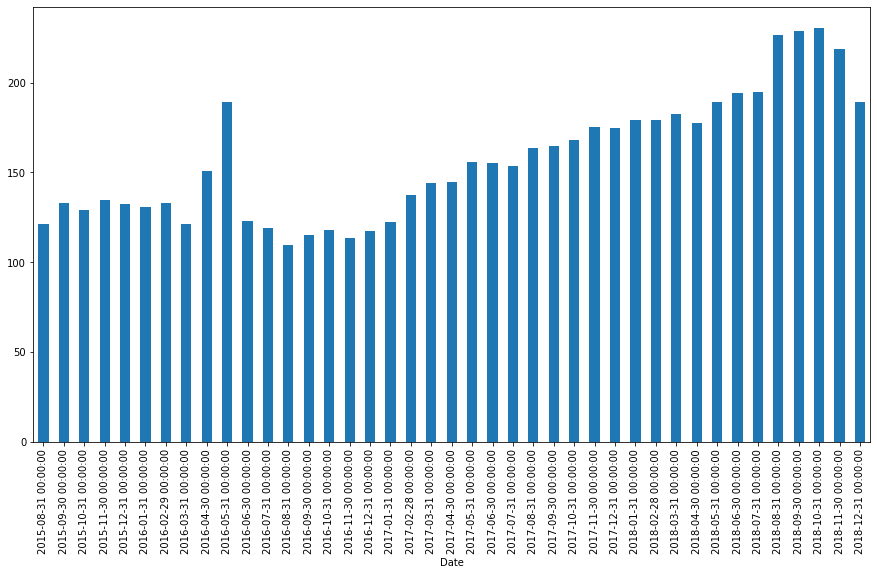

In [13]:
# Sampling을 이용하면 Chart를 만들 때에도 유용하다

#1. 가령 '종가(close)'의 연편균을 Bar Chart로 그려라 라고 한다면,
df['Close'].resample('A').mean()   # rule은 첫 번째 파라미터이기에 positional argement로 사용하여도 된다
    # 이렇게 mean() 까지 입력하면 pandas.Series object가 return 된다
df['Close'].resample('A').mean().plot(kind='bar')
    # Apple 주식이라 올라가기만 하고 떨어지지는 않는다
    
#2. Open 가격의 월별 최대값을 Bar Chart로 그려라 라고 한다면, 
df['Open'].resample('M').max().plot(kind='bar', figsize=(15,8))    # 데이터가 많기 때문에 figsize=shape 를 통해 키웠다
    # 계속 올라가는 추세였으나 최근 조금 떨어지고 있다
    # datetime index 이기 때문에 범위 제한도 바로 할 수 있다
df['Open']['2015':].resample('M').max().plot(kind='bar', figsize=(15,8))    # 2015년 이후 데이터만
df['Open']['2015-08':].resample('M').max().plot(kind='bar', figsize=(15,8))    # 2015년 8월 이후 데이터만
    # ['2015-8'], ['2015.08'], ['2015/08'] 가능

In [14]:
# datetime index를 규칙에 따라 만들어주는 function
daily_daterange = \
pd.date_range(
    start=datetime(2018,9,1), 
    end=datetime(2019,1,24), 
    freq='B')    # freq='B', 즉 Business 기준으로 만들면 토요일, 일요일이 없다 (Business Day만 indexing)
    # Pandas가 아니었다면 날짜마다 loop를 돌며 토요일인지 일요일 인지 확인해서 빼야하는 번거러움이 있었을 것이다

# 이제 인덱스(daily_daterange)가 생겼으니 이를 이용하는 데이터를 만들어보자
daily_dataset = \
pd.DataFrame(
    data={'value': np.random.rand(len(daily_daterange))}, 
    index=daily_daterange)

daily_dataset.head(10)
    # 08, 09 일이 빠져있다 (주말이기 떄문에 Index에서 제외되었다)

,value
2018-09-03,0.718770
2018-09-04,0.550431
2018-09-05,0.470833
2018-09-06,0.643829
2018-09-07,0.065297
2018-09-10,0.383009
2018-09-11,0.496644
2018-09-12,0.320595
2018-09-13,0.098906
2018-09-14,0.798135


In [ ]:
# 이 daily_dataset을 Resampling 해보자
#1. 해당 주의 minimum 값을 월요일 값으로 표시하려면,
daily_dataset.resample('W-MON').min()
    # 모두 월요일만 indexing 되었고 해당 주의 minimum 값이 해당 cell의 value로 assign되었다
    # W(eekly) 뒤에 MON TUE 같은 요일을 붙여 다양한 Resampling 응용을 가능하게 한다

In [ ]:
daily_dataset.resample('M').min()
    # Monthly Resampling은 기본적으로 해당 달의 마지막 날을 Index로 사용하게 된다
    # 만약에 Groupby로 한다면, 해당 달의 마지막 날을 가져오는 데에도 힘이 들 수 있다

## ___Time Shifting___
 - #### 시계열 분석 알고리즘을 사용하기 위해 데이터를 임의 시간만큼 앞 또는 뒤로 이돌시켜야 할 때가 있습니다.
 - #### Pandas는 이런 경우에도 매우 쉬운 방법을 제공합니다.

In [17]:
# 다시 Apple Stock 데이터를 읽을게요..
df = pd.read_csv('data/apple_stock.csv', index_col='Date')
    # 원 데이터에는 Data라는 Column이 Column의 형태로 있었는데 바로 Index로 읽어들인다. set_index()를 할 필요가 사라진다
df.index
    # datetime type 이 아니라 object type(구체적으로는 string type) 이다
# df['2009'] "2009년만 가져와라" => 택도 없습니다.. 

# index를 datetime 형태로 바꿔주자
df.index = pd.to_datetime(df.index)
df.index
    # datetime type으로 바뀐 걸 확인할 수 있다
    
# index를 datetime index로 바꾸는 방법
#1. Date Column에 DataFrame.apply(to_datetime)으로 datetime index로 변환 후, pd.set_index(Data) 한다
#2. index를 to_datetime()을 통해 datetime으로 만들고 df.index에 덮어썼다 (이미 pd.read_csv()에서 Date를 index로 지정)

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [18]:
temp = np.asarray(df['Close'])   # asarray()는 객체를 참조한다
temp[:-1]
temp[1:]
    # 이렇게 2가지 temp 버전은 <<1 Shifting 된 형태이다
    # 허나 이렇게 모든 Column을 하기 번거롭다
    # 따라서 Pandas에서는 DataFrame.shift() 라는 함수를 제공한다

array([ 30.5728569 ,  30.62571335,  30.13857079, ..., 156.1499939 ,
       156.22999573, 157.74000549])

In [19]:
df.shift(1).head()    # DF.shift() 안에는 얼마나 shifting 할 지 hyper-parameter를 지정해준다 (1이면 한 칸씩 뒤로 민다)
    # 이렇게 하면 첫번째 row는 모두 결측치가 된다 = 데이터를 잃게 된다
    # 이것은 Pandas 만의 문제가 아니라 Time Shifting 하는 것의 숙명이죠..

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [20]:
df.shift(-1).tail()
    # 한 칸씩 앞으로 보내면 Missing Data 가 맨 끝 row 에서 발생하게 된다

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-24,157.229996,146.720001,148.300003,157.169998,58582500.0,157.169998
2018-12-26,156.770004,150.070007,155.839996,156.149994,53117100.0,156.149994
2018-12-27,158.520004,154.550003,157.500000,156.229996,42291400.0,156.229996
2018-12-28,159.360001,156.479996,158.529999,157.740005,35003500.0,157.740005
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# 후반부에 가면 lagging, lag, lagged data 등으로 부른다 "한 차원 래깅했다"라고 말한다
# 위와 같이 lagging 할 차원수를 줘서 shifting 하는 법만 있는게 아니라 tshift(Time Shift)도 있다
df.tshift(freq='M', periods=1).head()    # periods가 12면 1년 만큼 shifting 하는 것이다

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## Difference btw ___np.array()___ and ___np.asarray()___
 - #### np.array() 는 단순히 값만을 복사한다 (___copy=True___)
 - #### np.asarray() 는 원본을 참조한다 (값을 바꾸면 원본도 바뀜. ___copy=false___)

In [22]:
arr_0 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

arr_1 = np.array(arr_0)
arr_1[0, :] = [10, 10, 10]

arr_2 = np.asarray(arr_0)
arr_2[1, :] = [20, 20, 20]

arr_0
    # arr_1에서는 값이 바뀌지만 arr_0에서는 바뀌지 않는다
    # arr_2에서 값이 바뀌고 arr_0에서도 값이 바뀐다

array([[ 1,  2,  3],
       [20, 20, 20],
       [ 7,  8,  9]])

## ___Rolling___
 - #### 매일 수집한 데이터들에는 노이즈가 포함되기도 합니다.
 - #### 이럴 경우 데이터의 일반적인 트렌드를 구하기 위해 rolling mean (또는 moving average)을 사용하기도 합니다.
 - #### Pandas 에 내장된 rolling 함수를 이용하면 주어진 시한 내 평균 (rolling mean) 등을 구할 수 있습니다.
 - #### 임의 시간 간격의 window 를 만들고 그 안에서 mean 같은 통계적 aggregation을 실행하면 됩니다.

In [23]:
# 또 한 번 Apple Stock을 읽을게요.. 이번에는 또 다른 방법입니다..
df = pd.read_csv('data/apple_stock.csv', 
                 index_col='Date', parse_dates=True)
    # 'parse_dates' parameter를 통해 Date를 Parsing 할 수 있다
    # Column을 검사해서 Parsing 할 수 있는 형태의 칼럼을 발견하면 datetime type으로 변환한다

In [24]:
# 또한 parse_dates 의 parameter로 True 대신에 List type을 줄 수도 있다
pd.read_csv('data/apple_stock.csv',
           index_col='Date', parse_dates=['Date'])    # 변환하길 원하는 Column을 직접 지정할 수 있다
    # parse_dates=True 만 했을 때는 변환이 안될 수도 있기에 직접 Column을 지정(여기서는 'Date') 해줌으로써 에러를 방지한다
    # 그렇다면 Parsing이 안되는 Column은 어떻게 하느냐? e.g) '2019-JAN-01', '19-01-01'
    
# Parsing이 안되는 경우 Parsing Function을 만들어 줘야한다
def  selfmade_date_parser(str_dt):
    return pd.datetime.strptime(str_dt, "%Y-%m-%d")    # stptime() function은 'string parse time'이라는 뜻이다

df = pd.read_csv('data/apple_stock.csv',
                index_col='Date',
                parse_dates=['Date'],
                date_parser=selfmade_date_parser)

In [25]:
# selfmade_date_parser 확인
selfmade_date_parser('2020-01-01')
def  selfmade_date_parser_2(str_dt):
    return pd.datetime.strptime(str_dt, "%d-%m-%Y")
    # 만약 datetime 의 format이 dd-mm-yyyy 일 때는 이렇게 바꾸어준다

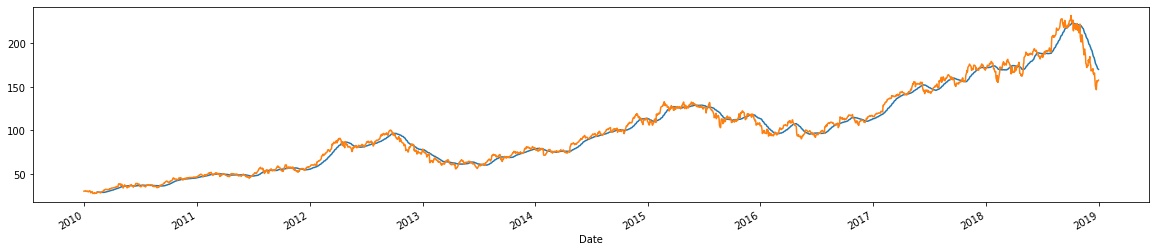

In [26]:
# 7일 짜리 rolling mean 을 구해볼게요..
df.rolling(7)    # rolling()의 parameter로 periods가 들어온다. 7개 짜리 윈도우를 만들어서 옮겨가면서 Sampling을 한다. 각 sample 별로 7개씩 데이터가 들어온다
df.rolling(7).mean()    # 들어온 7개의 데이터를 mean aggregation 해주면 된다
    # 7일치가 rolling이 되었기 때문에 앞에 7개는 데이터가 모자라다
    # 7일이 되기 전까지는 7개가 안차기 때문에 결측치로 나타난다
    # rolling 하는 periods 만큼 Missing Data가 발생할 수 밖에 없다
    
# rolling() 함수는 Moving Average, 트렌드를 구하기 위해 사용한다
# e.g) 주식의 Close 가격의 트렌드를 보고싶다
df.rolling(window=30).mean()['Close'].plot(figsize=(20,4))
df['Close'].plot()    # 원래 데이터(주황)

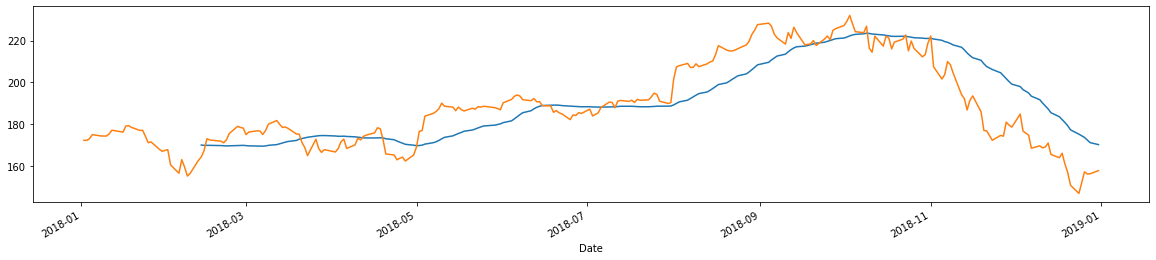

In [27]:
# 2018년만 일단 본다면,
df['2018':].rolling(30).mean()['Close'].plot(figsize=(20,4))
df['2018':]['Close'].plot()
    # Moving average의 문제가 뒤따라간다는 것이다 
    # window size 가 커질수록 실제를 반영하기 힘들어진다

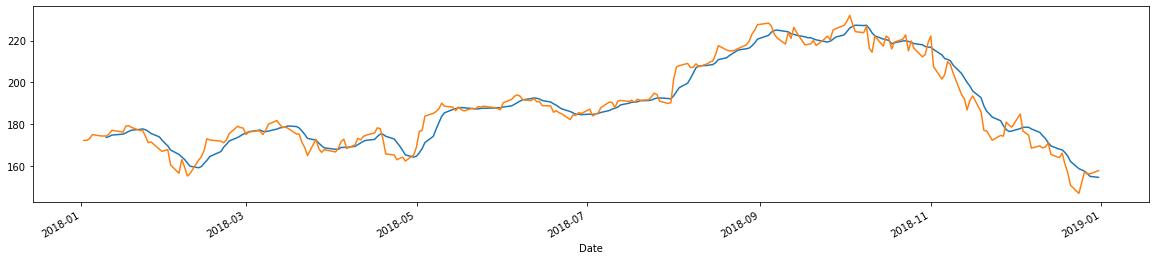

In [28]:
df['2018':].rolling(7).mean()['Close'].plot(figsize=(20,4))
df['2018':]['Close'].plot()
    # window=7로 바꾼다면 더 빨리 따라가는 트렌드 곡선을 볼 수 있다

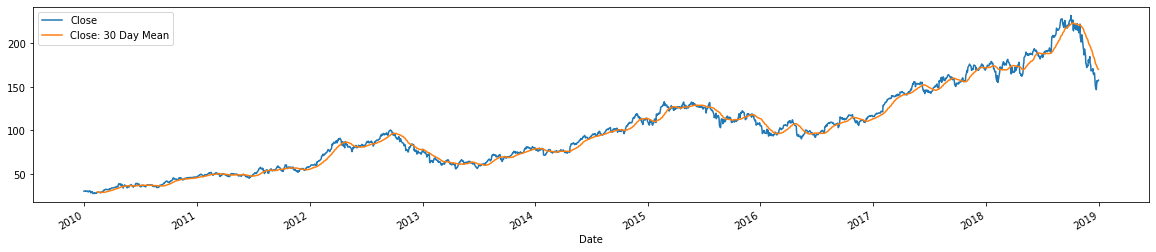

In [29]:
df['Close: 30 Day Mean'] = df['Close'].rolling(30).mean()
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(20,4))

## ___Expanding___
 - #### 매일 수집한 데이터들에는 노이즈가 포함되기도 합니다.
 - #### 이럴 경우 데이터의 일반적인 트렌드를 구하기 위해 rolling mean (또는 moving average)을 사용하기도 합니다.
 - #### Pandas 에 내장된 rolling 함수를 이용하면 주어진 시한 내 평균 (rolling mean) 등을 구할 수 있습니다.
 - #### 임의 시간 간격의 window 를 만들고 그 안에서 mean 같은 통계적 aggregation을 실행하면 됩니다.

In [30]:
# 만약 
a_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]    # 이라는 리스트가 있다면 
# rolling(window=2)은 (1, 2), (2, 3), (3, 4), (4, 5), ... 와 같이 틀(window)를 고정시키고 한 칸씩 이동하며 Aggregation한다
# expand는 시점을 고정하고 (1), (1, 2), (1, 2, 3), (1, 2, 3, 4), ... 와 같이 periods만큼 늘려가면서 expand 하는 것을 expanding 이라고 한다

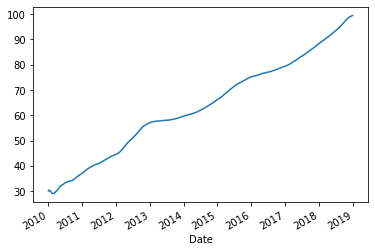

In [31]:
df['Close'].expanding(min_periods=1).mean().plot()    # 종가의 누적 평균을 Plotting 하기

In [7]:
# Apple Stock Price로 볼린져 밴드 그려보기
# df['Close'].rolling(20)에  +std*2 와 -std*2 해서 그려주면 된다

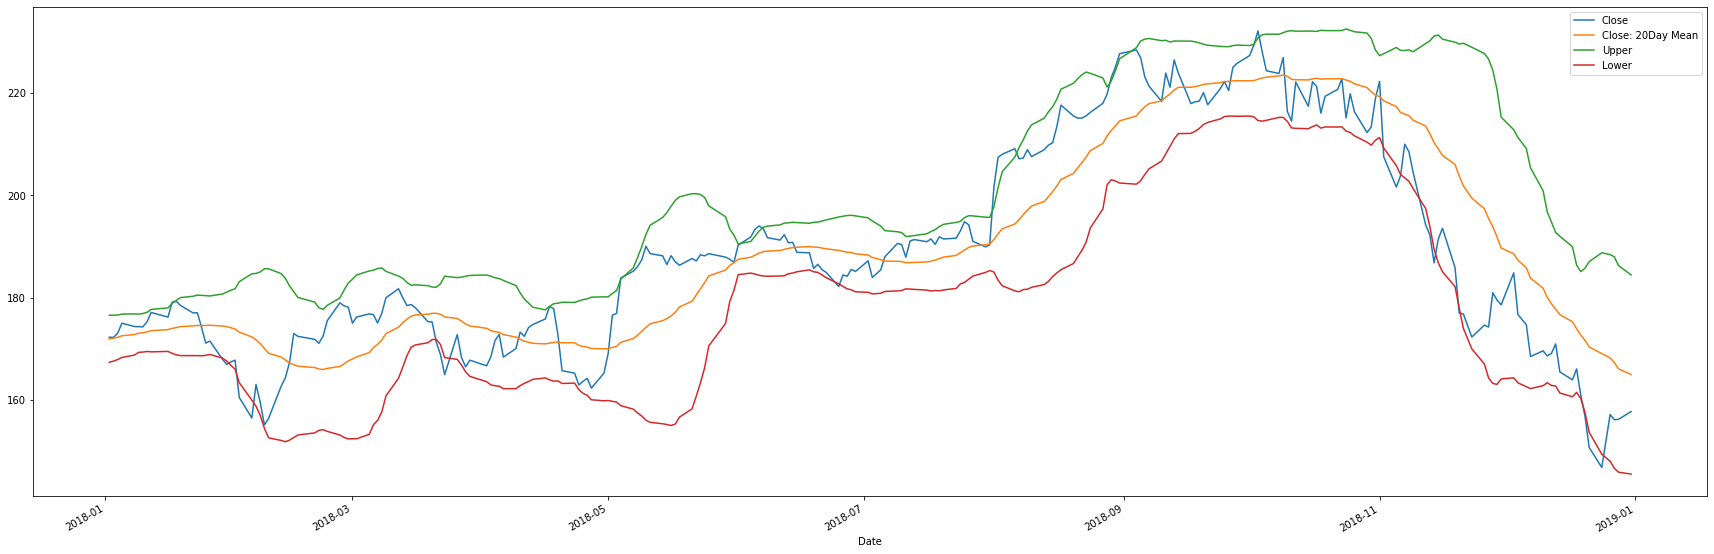

In [33]:
df['Close: 20Day Mean'] = df['Close'].rolling(20).mean()
df['Upper'] = df['Close: 20Day Mean'] + 2 * df['Close'].rolling(20).std()
df['Lower'] = df['Close: 20Day Mean'] - 2 * df['Close'].rolling(20).std()
df['2018':][['Close', 'Close: 20Day Mean', 'Upper', 'Lower']].plot(figsize=(30, 10))    # 2018년 이후만 보고싶어서 ['2018':]를 추가해줬다
    # 볼린저 밴드는 Upper 보다 위에 있을 때 사고 Lower 보다 밑에 있을 때 팔아야하는 지표로 이용되기도 한다